In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Car Price.csv to Car Price.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the data
df = pd.read_csv('Car Price.csv')

# Display the first few rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Get the number of rows and columns
df.shape


(205, 26)

In [ ]:
# Get column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Check for missing values
df.isnull().all().sum()

0

In [ ]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   

In [ ]:
# Display the column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


# Cleaning the data

In [ ]:
# Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# checking how many unique company names are there
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing invalid values¶
* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen =  vw

In [ ]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# Visualizing the data

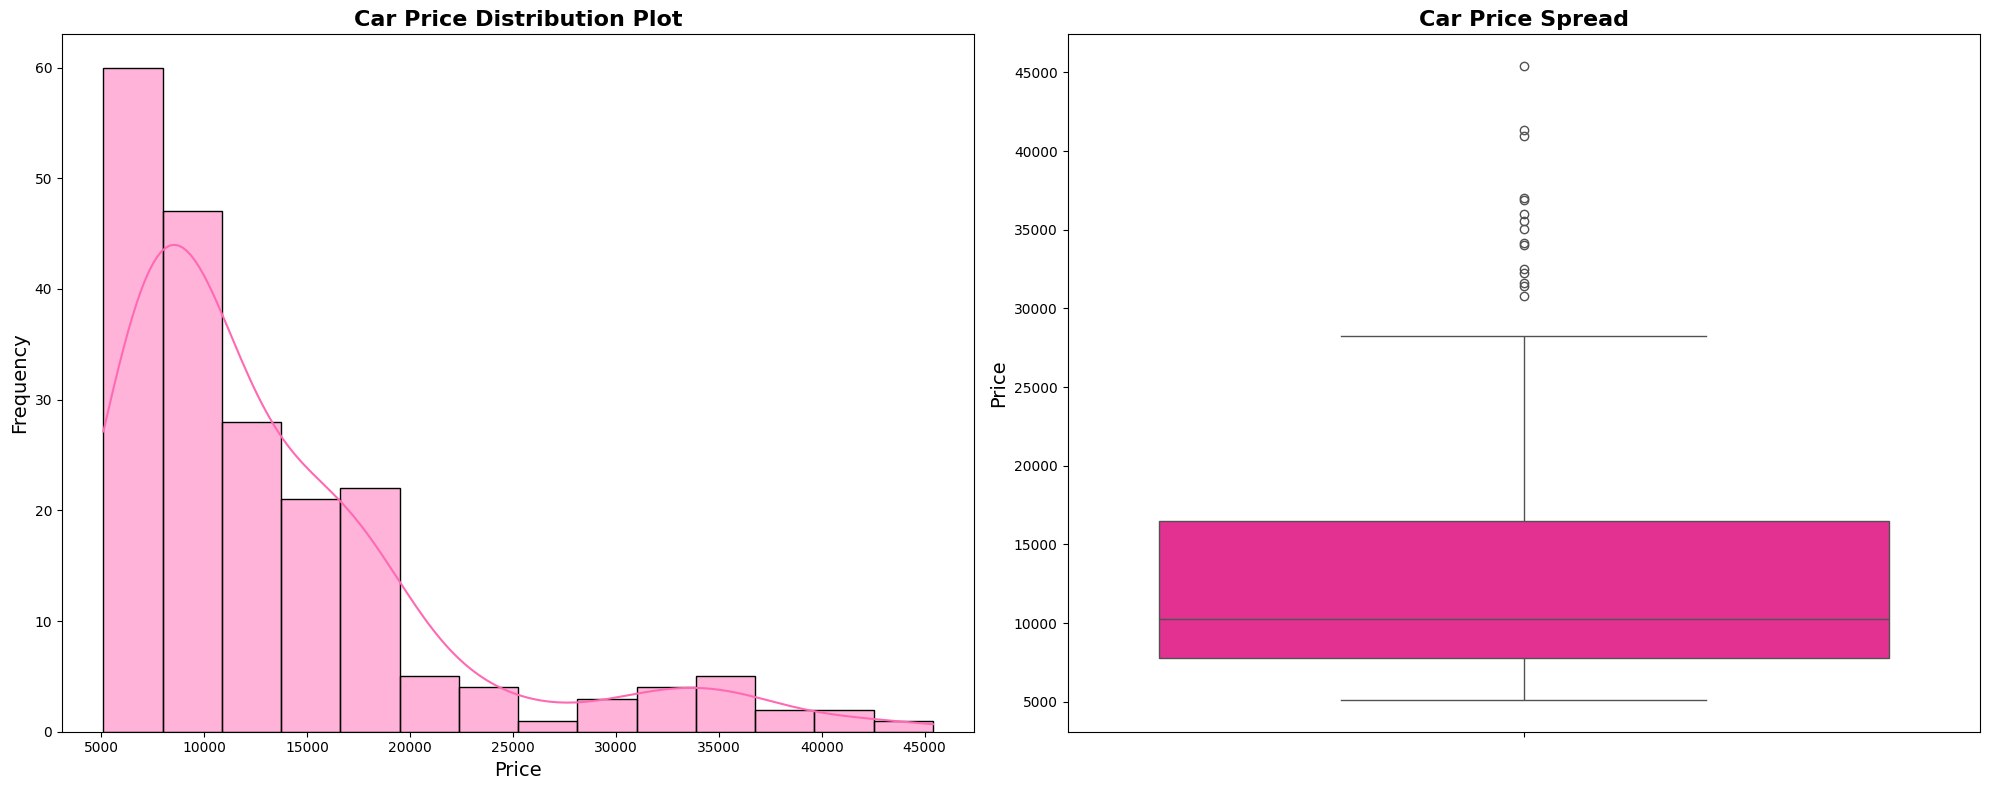

In [ ]:
# Define a pink color palette
pink_palette = sns.color_palette(["#FF69B4", "#FF1493", "#FFB6C1"])

# Create the figure and subplots
plt.figure(figsize=(20, 8))

# Plot 1: Distribution Plot
plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot', fontsize=16, fontweight='bold')
sns.histplot(df.price, kde=True, color=pink_palette[0])
# Adjust the appearance of the histogram and KDE
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot 2: Box Plot
plt.subplot(1, 2, 2)
plt.title('Car Price Spread', fontsize=16, fontweight='bold')
sns.boxplot(y=df.price, color=pink_palette[1])
# Adjust the appearance of the box plot
plt.ylabel('Price', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


The plot is right-skewed, which indicates that the most prices in the dataset are below 15,000. Also there is a significant difference between the mean and the median of the price distribution.

The data points are far spread out from the mean, which indicates a high variance in the car prices. 85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.

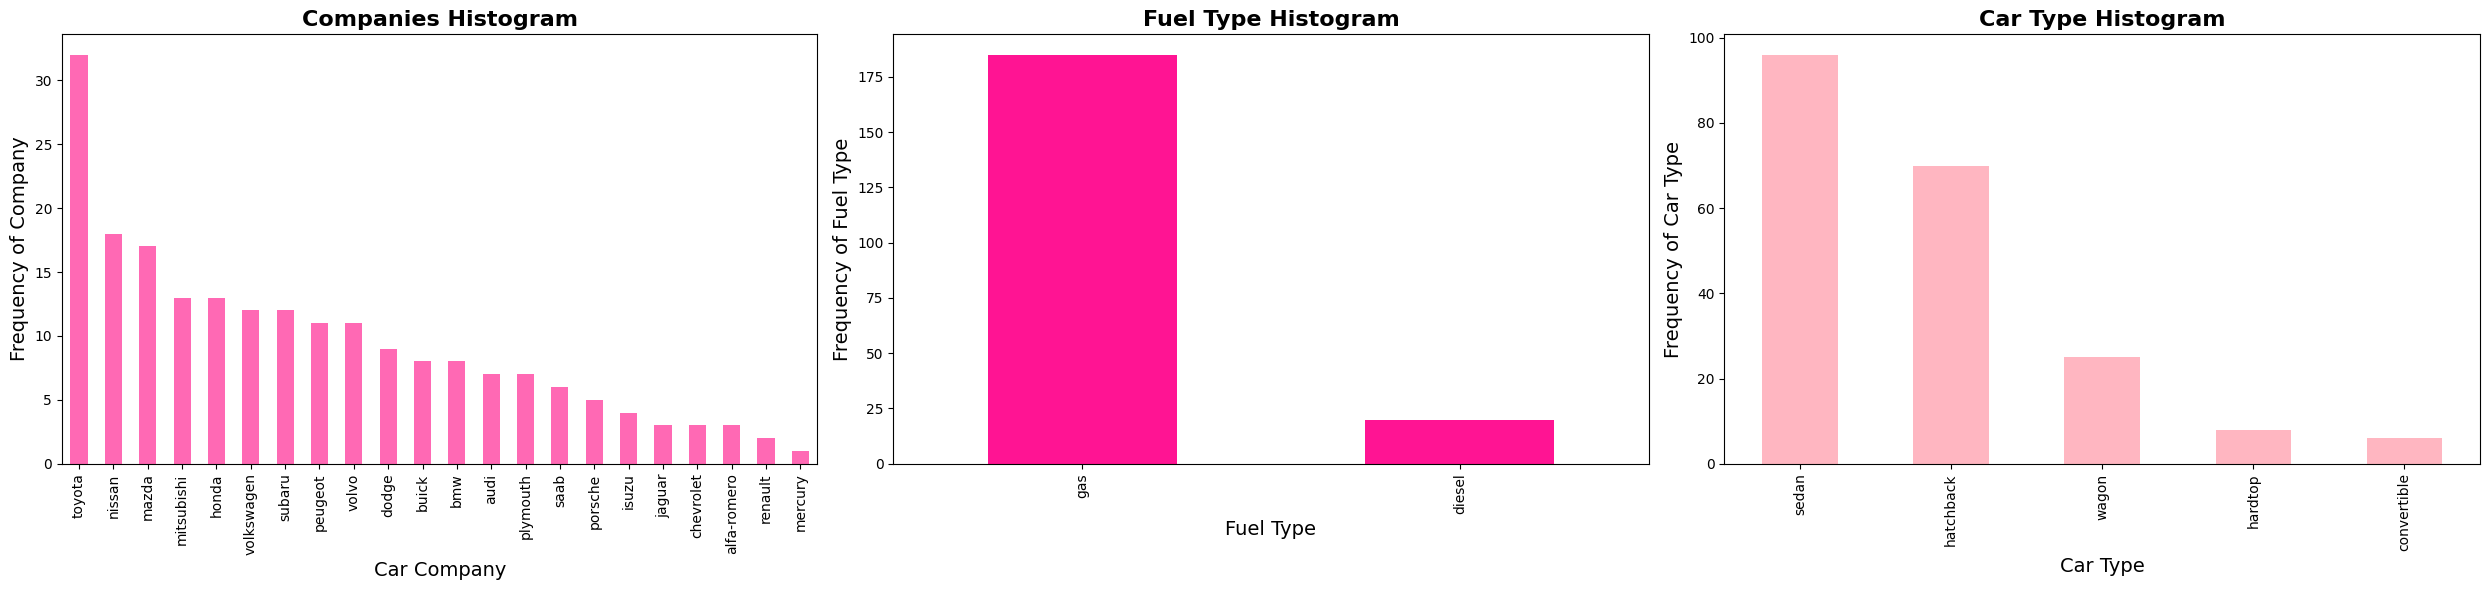

In [ ]:
# Define pink shades for the bar plots
pink_shades = ["#FF69B4", "#FF1493", "#FFB6C1"]

# Create the figure and subplots
plt.figure(figsize=(25, 6))

# Plot 1: Companies Histogram
plt.subplot(1, 3, 1)
plt1 = df.CompanyName.value_counts().plot(kind='bar', color=pink_shades[0])
plt.title('Companies Histogram', fontsize=16, fontweight='bold')
plt.xlabel('Car Company', fontsize=14)
plt.ylabel('Frequency of Company', fontsize=14)

# Plot 2: Fuel Type Histogram
plt.subplot(1, 3, 2)
plt1 = df.fueltype.value_counts().plot(kind='bar', color=pink_shades[1])
plt.title('Fuel Type Histogram', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Frequency of Fuel Type', fontsize=14)

# Plot 3: Car Type Histogram
plt.subplot(1, 3, 3)
plt1 = df.carbody.value_counts().plot(kind='bar', color=pink_shades[2])
plt.title('Car Type Histogram', fontsize=16, fontweight='bold')
plt.xlabel('Car Type', fontsize=14)
plt.ylabel('Frequency of Car Type', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* Toyota is favored car company.
* Number of gas fueled cars are more than diesel.
* Sedan is the top car type prefered.

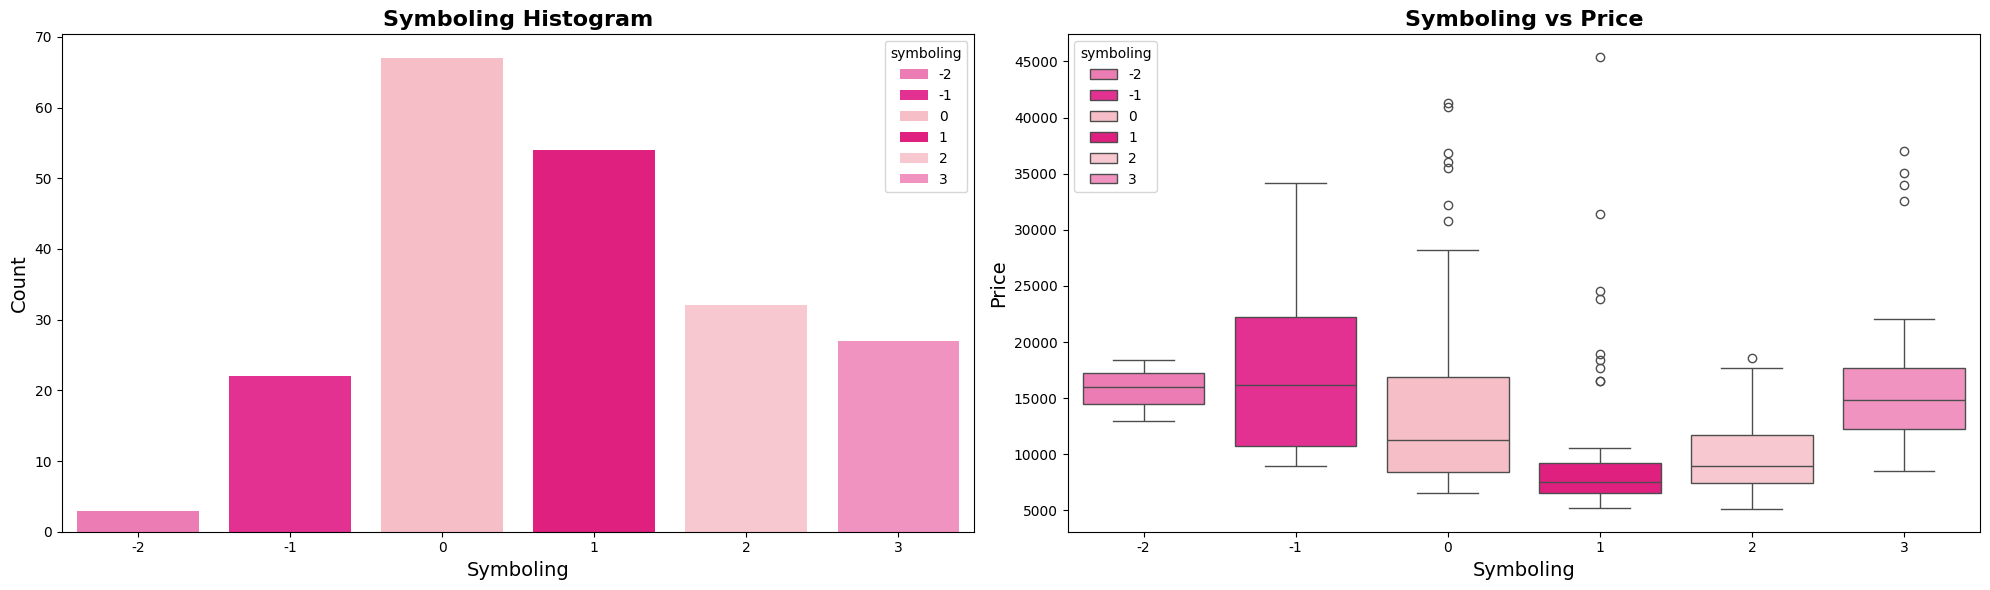

In [ ]:
# Define a pink color palette with enough colors
pink_palette = sns.color_palette(["#FF69B4", "#FF1493", "#FFB6C1", "#FF007F", "#FFC0CB", "#FF84C1"])

# Create the figure and subplots
plt.figure(figsize=(20, 6))

# Plot 1: Symboling Histogram
plt.subplot(1, 2, 1)
plt.title('Symboling Histogram', fontsize=16, fontweight='bold')

# Count the number of unique categories
num_categories = len(df['symboling'].value_counts())

# Use hue to avoid the warning and apply the pink color palette
sns.countplot(x='symboling', data=df, palette=pink_palette[:num_categories], hue=df['symboling'])
plt.xlabel('Symboling', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Plot 2: Symboling vs Price
plt.subplot(1, 2, 2)
plt.title('Symboling vs Price', fontsize=16, fontweight='bold')

# Use hue to avoid the warning and apply the pink color palette
sns.boxplot(x='symboling', y='price', data=df, palette=pink_palette[:num_categories], hue=df['symboling'])
plt.xlabel('Symboling', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* Symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
* The cars with -1 symboling are high priced (as it makes sense too, insurance risk rating -1 is quite good). But symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

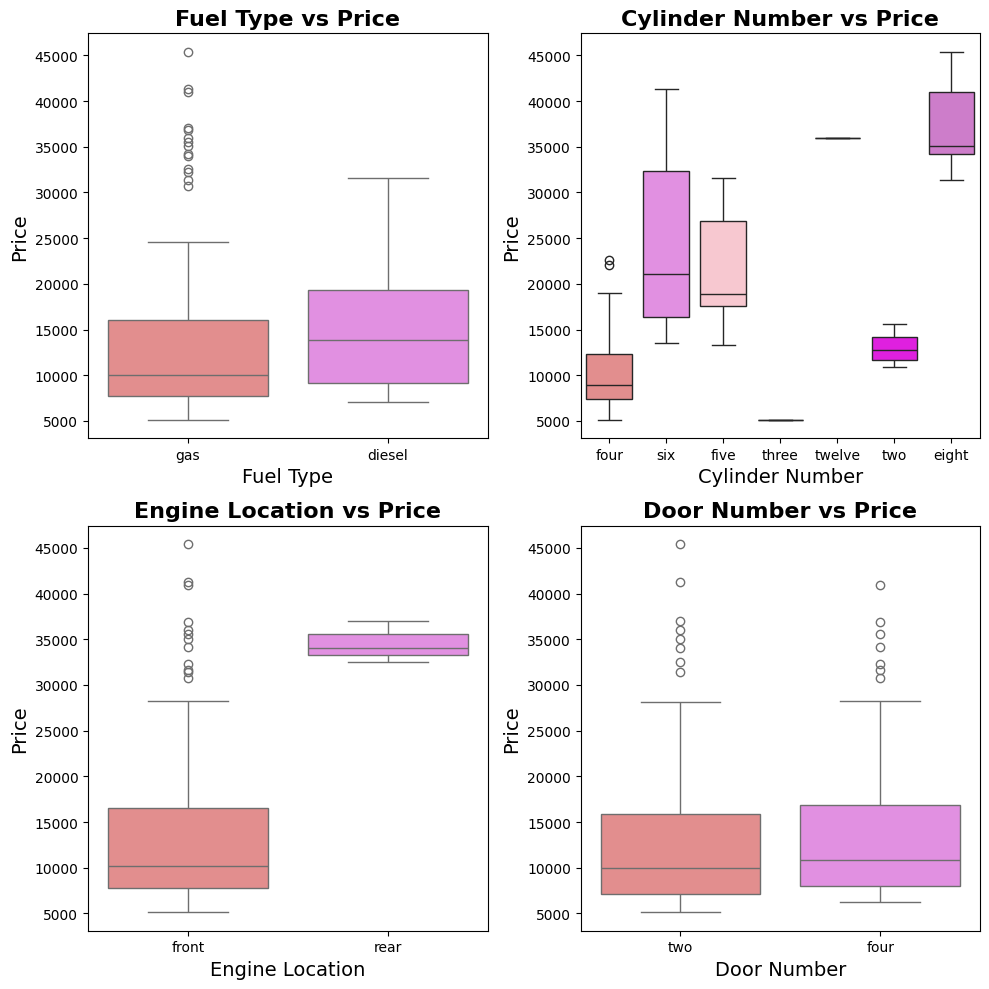

In [ ]:
# Define pink shades for the plots
pink_palette = sns.color_palette(['lightcoral', 'violet', 'pink', 'purple', 'hotpink', 'magenta', 'orchid'])

# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Plot 1: Fuel Type vs Price
plt.subplot(2, 2, 1)
plt.title('Fuel Type vs Price', fontsize=16, fontweight='bold')
sns.boxplot(x='fueltype', y='price', data=df, palette=pink_palette[:len(df['fueltype'].unique())], hue='fueltype')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Plot 2: Cylinder Number vs Price
plt.subplot(2, 2, 2)
plt.title('Cylinder Number vs Price', fontsize=16, fontweight='bold')
sns.boxplot(x='cylindernumber', y='price', data=df, palette=pink_palette[:len(df['cylindernumber'].unique())], hue='cylindernumber')
plt.xlabel('Cylinder Number', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Plot 3: Engine Location vs Price
plt.subplot(2, 2, 3)
plt.title('Engine Location vs Price', fontsize=16, fontweight='bold')
sns.boxplot(x='enginelocation', y='price', data=df, palette=pink_palette[:len(df['enginelocation'].unique())], hue='enginelocation')
plt.xlabel('Engine Location', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Plot 4: Door Number vs Price
plt.subplot(2, 2, 4)
plt.title('Door Number vs Price', fontsize=16, fontweight='bold')
sns.boxplot(x='doornumber', y='price', data=df, palette=pink_palette[:len(df['doornumber'].unique())], hue='doornumber')
plt.xlabel('Door Number', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

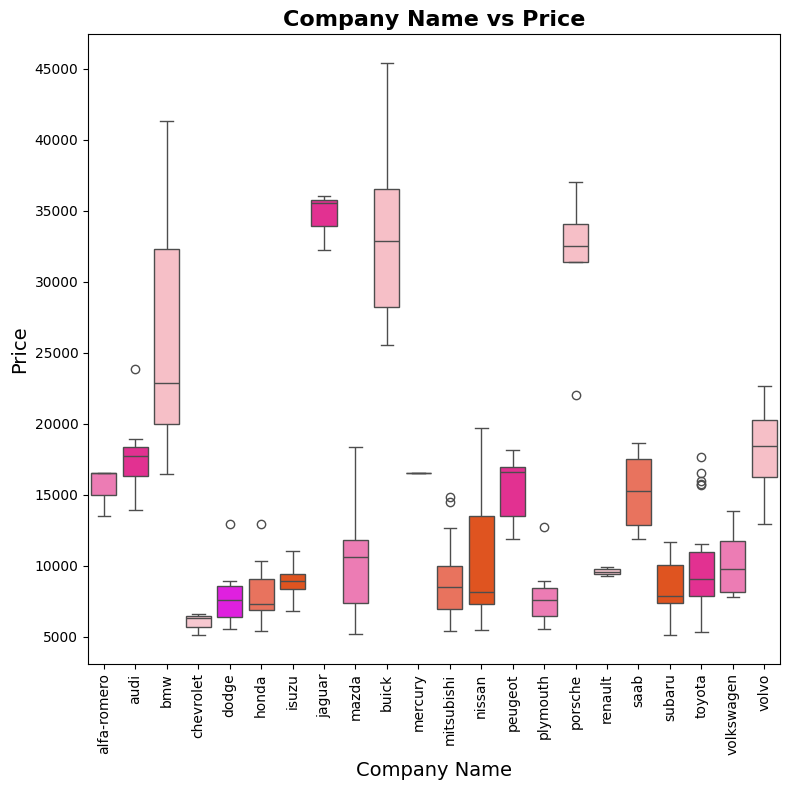

In [ ]:
# Define a more extensive pink palette to handle many unique values
pink_palette = sns.color_palette(
    ["#FF69B4", "#FF1493", "#FFB6C1", "#FFC0CB", "#FF00FF", "#FF6347", "#FF4500", "#FF1493", "#FF69B4", "#FFB6C1",
     "#FFC0CB", "#FF6347", "#FF4500", "#FF1493", "#FF69B4", "#FFB6C1", "#FFC0CB", "#FF6347", "#FF4500", "#FF1493",
     "#FF69B4", "#FFB6C1"]
)

# Create the figure and subplot
plt.figure(figsize=(8, 8))

# Plot: Company Name vs Price
plt.title('Company Name vs Price', fontsize=16, fontweight='bold')
sns.boxplot(x='CompanyName', y='price', data=df, palette=pink_palette[:len(df['CompanyName'].unique())], hue='CompanyName')
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Data augmentation and feature engineering

In [ ]:
# Divide Car Prices into Buckets

# Define price buckets
bins = [0, 10000, 20000, 30000, float('inf')]
labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury']

# Create a new column for price buckets
df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Check the result
print(df[['price', 'price_bucket']].head())

     price price_bucket
0  13495.0    Mid-Range
1  16500.0    Mid-Range
2  16500.0    Mid-Range
3  13950.0    Mid-Range
4  17450.0    Mid-Range


In [ ]:
# Feature Engineering: One-Hot Encoding

# List of categorical columns to encode
categorical_columns = [
    'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the result
print(df_encoded.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

# Building a linear regression model

In [ ]:
# Define feature columns and target column
feature_columns = [
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]
target_column = 'price'

y = df[target_column]

# Optional: One-hot encode categorical columns if needed
categorical_columns = ['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
X = pd.get_dummies(df[feature_columns + categorical_columns], drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the R² score
score = r2_score(y_test, y_pred)

print(f'R² Score: {score:.4f}')

R² Score: 0.9140
